# The Abalone Dataset


##### This dataset is about a coastal species known as Abalone. Abalone is also a food source in many cultures around the world.  

##### Problem Statement: In this dataset, we will use the shell, which is the physical characteristic of the Abalone, to predict the Abalone's age. This analysis will include a linear regression model and a neural network to predict and we will then compare the accuracy of the two models. So, let's dive right in!

## **Import Statements**

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

2024-03-06 23:04:53.387881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Loading the Dataset into a DataFrame**

In [7]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


##### In the above data set we see that there are a total of 9 variables: Sex, Length, Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight, and Rings. We will be using the following variables in our analysis to find the age of the Abalone. We know that the age of the Abalone is given by: **Age = Rings + 1.5**. Therefore, we will add a column for our target variable which is Age. 

In [8]:
df["Age"] = df["Rings"] + 1.5
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


## **Univariate Analysis**

#### Checking for Missing Values in the Dataset

In [9]:
df.isnull().values.any()

False

##### We see that there are no null values, so let's move onto some descriptive statistics!

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


#### Some important inferences from the descriptive statistics above are:
1. All the variables are numerical other than sex
2. Each of the variables above has a different scale
3. Our target variable of age has a mean of 11.43 and a standard deviation of 3.22
4. The minimum value of the target variable is 2.50 and the maximum value is 30.50

In [11]:
numerical_cols = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings", "Age"]

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

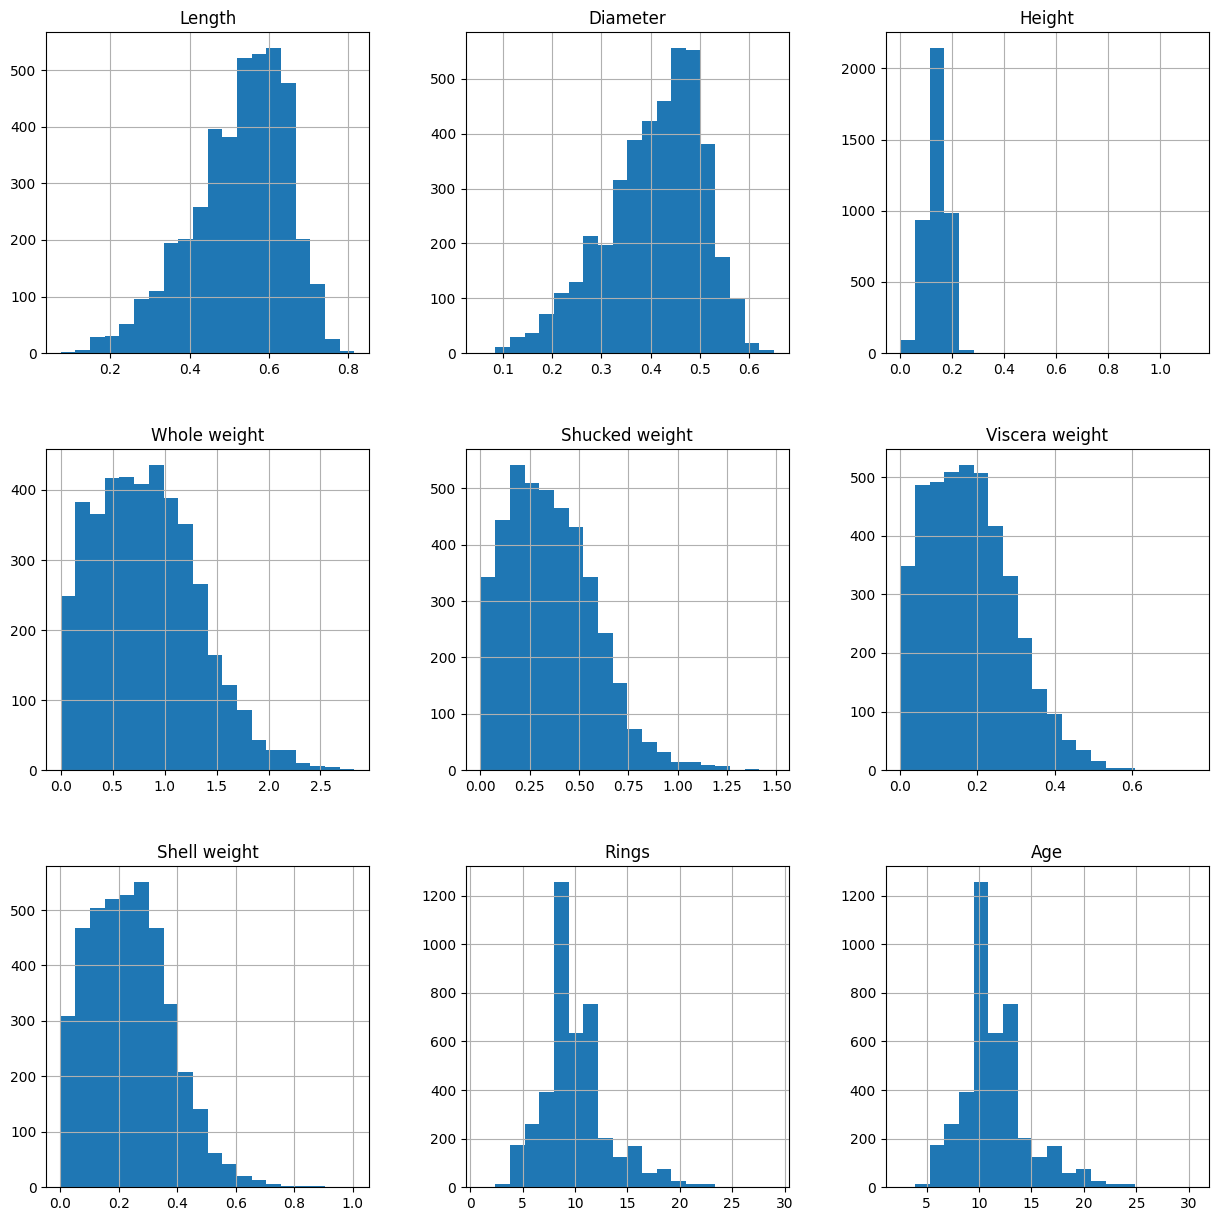

In [12]:
df.hist(bins = 20, figsize=(15, 15))

##### Most of the characteristics above are normally distributed on a histogram. The histograms are not too thick on the edges, so the standard deviation would be lower. 

### A count plot for the sex of the abalone species

<Axes: xlabel='Sex', ylabel='count'>

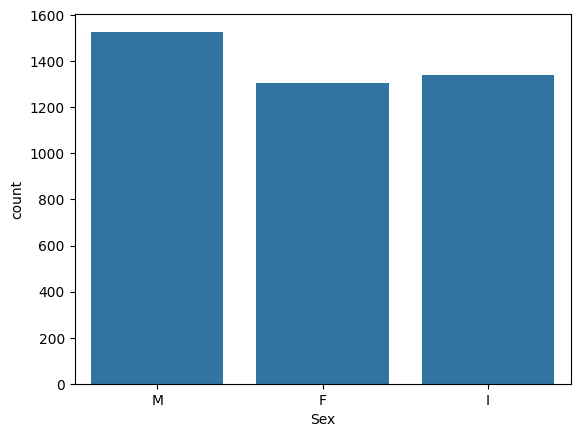

In [13]:
sns.countplot(data = df, x = 'Sex')

##### The above countplot states that there are approximately equal number of F, which is females, and I (infants). However, the number of males is a bit high. 

## **Understanding Correlation**

#### The main point of this section is to understand the correlation between the differernt physical characteristics of an abalone and the age of the abalone

In [16]:
corr = df[numerical_cols].corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


##### The main column we will be focusing on here is the Age column as the main focus of this data analysis is to predict the age using different physical characteristics. **We will not be considering rings as age is derived from adding 1.5 to rings.** So, we can see that the maximum correlation of any variable with age is that of the shell weight: 0.62754. While the least correlation is that of shucked weight which is 0.420884. 

### In order to understand the correlation, we can use a heat map to visualize it better. 

<Axes: >

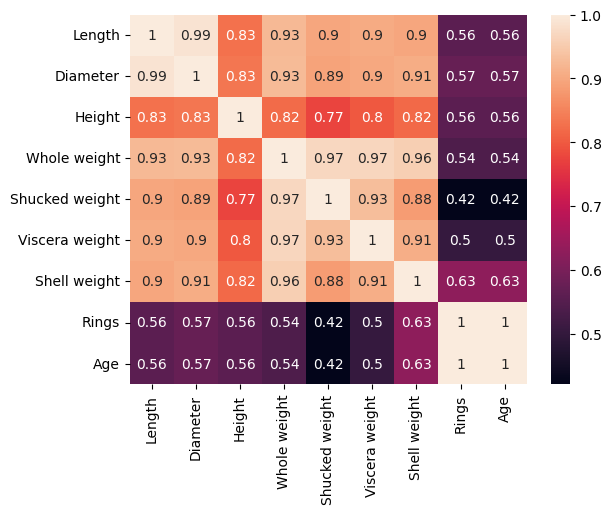

In [17]:
sns.heatmap(corr, annot = True)

##### We see that the shell weight has the maximum correlation, so we will first train a linear regression model based on the shell weight 

## **Linear Regression Model using shell weight to predict age**

In [18]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[["Shell weight"]]
y = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

##### Testing the Accuracy of the Model

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
shell_weight_prediction = reg.predict(X_test)
mae = mean_absolute_error(y_test, shell_weight_prediction)
mse = mean_squared_error(y_test, shell_weight_prediction)
r_square = r2_score(y_test, shell_weight_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r_square}")

Mean Absolute Error: 1.8560750680322435
Mean Squared Error: 6.4858910887618055
R-squared Value: 0.40085309555508564


Text(0.5, 0, 'Shell Weight')

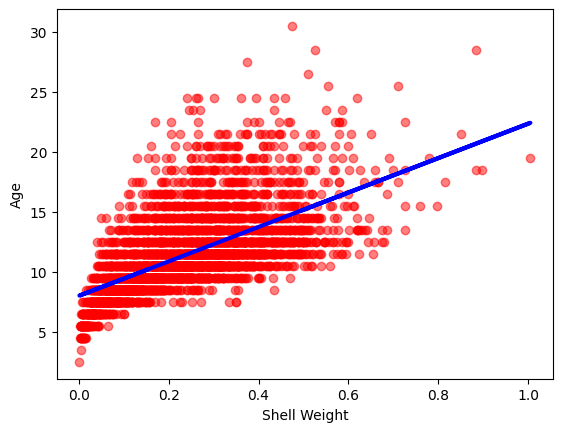

In [48]:
plt.scatter(X, y, color = "red", alpha = 0.5)
plt.plot(X, reg.predict(X), label = "Regression Line", alpha = 1.0, color = "blue", linewidth = 3)
plt.ylabel("Age")
plt.xlabel("Shell Weight")

## **Improving the Accuracy of the Linear Regression Model**

In [50]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [51]:
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [52]:
model = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
105/105 [==============================] - 3s 7ms/step - loss: 106.3912 - mean_absolute_error: 9.7813 - val_loss: 51.1153 - val_mean_absolute_error: 6.5787
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 15.4122 - mean_absolute_error: 2.9102 - val_loss: 6.4923 - val_mean_absolute_error: 1.8862
Epoch 3/100
105/105 [==============================] - 0s 4ms/step - loss: 6.2623 - mean_absolute_error: 1.8260 - val_loss: 6.4913 - val_mean_absolute_error: 1.8444
Epoch 4/100
105/105 [==============================] - 1s 7ms/step - loss: 6.2628 - mean_absolute_error: 1.8211 - val_loss: 6.4859 - val_mean_absolute_error: 1.8701
Epoch 5/100
105/105 [==============================] - 1s 8ms/step - loss: 6.2659 - mean_absolute_error: 1.8192 - val_loss: 6.5136 - val_mean_absolute_error: 1.9133
Epoch 6/100
105/105 [==============================] - 0s 4ms/step - loss: 6.2643 - mean_absolute_error: 1.8203 - val_loss: 6.4883 - val_mean_absolute_error: 1.8778
Epoch 

In [56]:
loss, mae = nn_model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Mean Absolute Error:", mae)

27/27 [==============================] - 0s 4ms/step - loss: 6.2708 - mean_absolute_error: 1.7792
Test Loss: 6.270798206329346
Mean Absolute Error: 1.7792267799377441


27/27 [==============================] - 0s 5ms/step


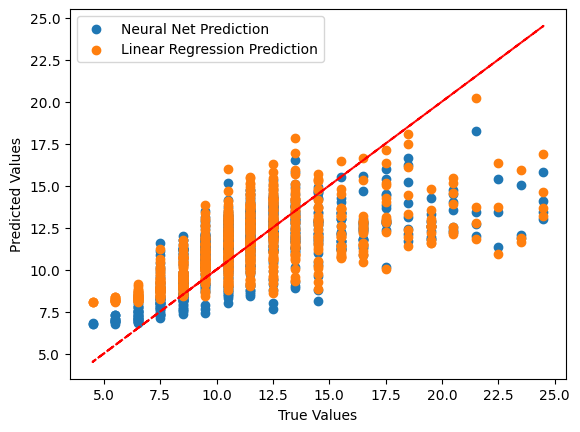

In [70]:
y_pred = nn_model.predict(X_test)
plt.scatter(y_test, y_pred, label = "Neural Net Prediction")
plt.scatter(y_test, shell_weight_prediction, label = "Linear Regression Prediction")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.plot(y_test, y_test, color='red', linestyle='--', label="Identity Line")

plt.show()

## **Conclusion**

##### This was an implementation of the linear regression model and neural networks in order to predict the age of the abalone. The neural network was more accurate as it had a mean absolute error of 1.7792, while the linear regression has a mean absolute error of 1.8560. 